# Model Creation

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pickle as pkl
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Model

In [23]:
sales = pd.read_csv("Data/sales.csv")
sales.drop(columns = "Unnamed: 0",inplace = True)
actor_analys = pd.read_csv("Data/actor_analys.csv")
actor_analys.dropna(how = "any", inplace = True)
actor_analys.drop(columns = "Unnamed: 0",inplace = True)

#Movie_Category_Recomandation

In [24]:
Movie_Category = pd.crosstab(index = sales["customer_id"],columns = sales["category_name"]).reset_index()
Movie_Category.dropna(how = "any",inplace = True)
Movie_Category_org = Movie_Category.copy()
Movie_Category_enc = Movie_Category.copy()
scaler = MinMaxScaler()
Movie_Category_enc = scaler.fit_transform(Movie_Category_enc)
Movie_Category_enc = pd.DataFrame(Movie_Category_enc)
Movie_Category_enc.drop(columns = 0,inplace = True)

In [25]:
Movie_Category

category_name,customer_id,Action,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,Horror,Music,New,Sci-Fi,Sports,Travel
0,1.0,2,2,0,6,5,1,4,1,1,1,0,2,2,2,2,1
1,2.0,3,3,1,4,0,1,0,1,1,2,0,1,2,1,5,2
2,3.0,4,3,0,1,2,1,1,1,0,2,2,2,2,3,2,0
3,4.0,1,1,1,1,2,1,2,1,2,0,3,0,1,2,2,2
4,5.0,1,6,2,7,1,1,1,4,1,3,2,2,3,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,595.0,1,2,2,1,2,4,2,2,2,1,2,3,2,1,2,1
595,596.0,2,0,0,2,1,1,2,3,2,1,1,3,1,1,5,3
596,597.0,0,1,3,1,1,2,0,2,4,2,1,1,0,3,2,2
597,598.0,1,1,1,1,3,1,3,2,3,2,1,0,0,0,2,1


In [5]:
n_features = Movie_Category_enc.shape[1]
input_layer = Input(shape = (n_features,))
hl1 = Dense(10, activation = 'relu')(input_layer)
hl2 = Dense(5, activation = 'relu')(hl1)
hl3 = Dense(10, activation = 'relu')(hl2)
output_layer = Dense(n_features, activation = 'linear')(hl3)

Movie_Category_auto_encoder = Model(input_layer, output_layer)
Movie_Category_auto_encoder.compile(optimizer = 'adam', loss = 'mse')
result = Movie_Category_auto_encoder.fit(Movie_Category_enc,Movie_Category_enc,epochs=50,validation_split = 0.15,batch_size=16)
Movie_Category_reconstructor = Movie_Category_auto_encoder.predict(Movie_Category_enc)

Movie_Category_reconstructor = pd.DataFrame(Movie_Category_reconstructor)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0891 - val_loss: 0.0632
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0651 - val_loss: 0.0431
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0455 - val_loss: 0.0346
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0376 - val_loss: 0.0323
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0363 - val_loss: 0.0316
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0334 - val_loss: 0.0314
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0338 - val_loss: 0.0309
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0329 - val_loss: 0.0305
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0342 - val_loss: 0.0301
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0330 - val_loss: 0.0298
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0323 - val_loss: 0.0293
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0317 - val_l

In [6]:
Movie_Category_reconstructor = Movie_Category_auto_encoder.predict(Movie_Category_enc)

Movie_Category_reconstructor = pd.DataFrame(Movie_Category_reconstructor)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step


In [7]:
Movie_Category_reconstructor

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.166305,0.234861,0.152512,0.242599,0.296577,0.255633,0.375022,0.212106,0.270269,0.198024,0.365575,0.354671,0.225743,0.378584,0.415155,0.211645
1,0.298760,0.247090,0.242854,0.212510,0.207866,0.213883,0.231372,0.256150,0.284772,0.157870,0.255853,0.204154,0.225113,0.231145,0.234124,0.184444
2,0.311702,0.200754,0.171046,0.206082,0.330430,0.140371,0.174856,0.283214,0.132364,0.157608,0.375557,0.147619,0.119482,0.392304,0.316271,0.176176
3,0.216126,0.181515,0.145143,0.195034,0.293494,0.166408,0.208630,0.198180,0.127890,0.152598,0.346409,0.205044,0.140512,0.317432,0.307221,0.180532
4,0.371921,0.331729,0.308356,0.267067,0.209200,0.281832,0.345564,0.362341,0.463621,0.200864,0.261626,0.275524,0.308324,0.311588,0.301076,0.207343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,0.158441,0.260102,0.209233,0.236162,0.189085,0.299566,0.387581,0.178617,0.366014,0.187394,0.257492,0.373155,0.297294,0.221855,0.320211,0.211880
595,0.156064,0.236498,0.159925,0.239487,0.273494,0.264590,0.377783,0.197220,0.284486,0.194811,0.342895,0.361190,0.239214,0.341799,0.395313,0.211583
596,0.310321,0.267070,0.257726,0.225371,0.205062,0.232963,0.262428,0.276602,0.329751,0.168237,0.254707,0.226175,0.247803,0.245246,0.249789,0.190490
597,0.235852,0.222148,0.211969,0.200408,0.201525,0.214450,0.235188,0.198906,0.246964,0.151245,0.253546,0.225985,0.217052,0.200230,0.234115,0.184138


In [9]:
Movie_Category_reconstructor.drop(columns = 0 , inplace = True)

In [10]:
model_type_2 = KMeans(n_clusters =15)
model_type_2.fit(Movie_Category_reconstructor)
group = model_type_2.predict(Movie_Category_reconstructor)
Movie_Category["cluster"]=group

In [11]:
Movie_Category

category_name,customer_id,Action,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,Horror,Music,New,Sci-Fi,Sports,Travel,cluster
0,1.0,2,2,0,6,5,1,4,1,1,1,0,2,2,2,2,1,12
1,2.0,3,3,1,4,0,1,0,1,1,2,0,1,2,1,5,2,11
2,3.0,4,3,0,1,2,1,1,1,0,2,2,2,2,3,2,0,5
3,4.0,1,1,1,1,2,1,2,1,2,0,3,0,1,2,2,2,2
4,5.0,1,6,2,7,1,1,1,4,1,3,2,2,3,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,595.0,1,2,2,1,2,4,2,2,2,1,2,3,2,1,2,1,1
595,596.0,2,0,0,2,1,1,2,3,2,1,1,3,1,1,5,3,12
596,597.0,0,1,3,1,1,2,0,2,4,2,1,1,0,3,2,2,0
597,598.0,1,1,1,1,3,1,3,2,3,2,1,0,0,0,2,1,11


In [12]:
# Assuming Movie_Category has original data with 'customer_id' and movie categories
def get_top_5_recommendations(customer_id, Movie_Category, sales):
    # Step 1: Get the cluster for the given customer
    customer_cluster = Movie_Category.loc[Movie_Category['customer_id'] == customer_id, 'cluster'].values[0]

    # Step 2: Filter customers in the same cluster
    same_cluster_customers = Movie_Category[Movie_Category['cluster'] == customer_cluster]['customer_id']

    # Step 3: Aggregate movie preferences of the same cluster customers
    cluster_sales = sales[sales['customer_id'].isin(same_cluster_customers)]
    movie_counts = cluster_sales['category_name'].value_counts()

    # Step 4: Get the top 5 recommended movies
    top_5_movies = movie_counts.head(5).index.tolist()

    return top_5_movies

# Example usage:
customer_id = 6.0  # Replace with actual customer_id
top_5_movies = get_top_5_recommendations(customer_id, Movie_Category, sales)
print(f"Top 5 movie recommendations for Customer {customer_id}: {top_5_movies}")

Top 5 movie recommendations for Customer 6.0: ['Sports', 'Animation', 'Family', 'Foreign', 'Action']


In [14]:
Movie_Category.to_csv("Model/Movie_Category_Cluster.csv")
sales.to_csv("Model/sales.csv")

# Actor Recomandation

In [15]:
actor_analys.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79591 entries, 0 to 88013
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         79591 non-null  float64
 1   film_id             79591 non-null  int64  
 2   amount              79591 non-null  float64
 3   customer_name       79591 non-null  object 
 4   customer_last_name  79591 non-null  object 
 5   customer_district   79591 non-null  object 
 6   customer_city       79591 non-null  object 
 7   customer_country    79591 non-null  object 
 8   rental_id           79591 non-null  float64
 9   category_name       79591 non-null  object 
 10  actor_id            79591 non-null  int64  
 11  actor_first_name    79591 non-null  object 
 12  actor_last_name     79591 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 8.5+ MB


In [16]:
actor_analys["actor_id"].value_counts()

actor_id
107    681
181    614
198    604
102    582
144    581
      ... 
35     231
199    227
31     214
186    197
148    196
Name: count, Length: 200, dtype: int64

In [17]:
actor_analys.dropna(how = "any",inplace = True)

In [18]:
Actor = pd.crosstab(index = actor_analys["customer_id"],columns = actor_analys["actor_id"]).reset_index()
Actor_cluster = Actor.drop(columns = "customer_id")
Actor_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Columns: 200 entries, 1 to 200
dtypes: int64(200)
memory usage: 931.4 KB


In [19]:
Actor

actor_id,customer_id,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,1.0,0,1,3,2,1,1,1,0,1,...,0,0,2,0,0,0,1,2,1,0
1,2.0,0,1,0,0,0,0,2,1,0,...,0,0,1,0,0,1,0,2,0,1
2,3.0,1,2,0,1,1,0,0,1,0,...,0,2,0,2,0,0,1,2,0,0
3,4.0,1,1,1,0,1,0,1,1,0,...,2,0,0,1,0,2,1,0,1,1
4,5.0,0,1,1,0,1,0,0,1,1,...,0,4,0,0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,595.0,0,2,1,0,0,1,0,0,0,...,1,2,1,0,0,0,0,1,0,0
592,596.0,0,0,0,0,1,2,1,1,0,...,1,0,2,1,0,0,2,2,1,0
593,597.0,2,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,0,1
594,598.0,1,0,0,0,0,1,1,1,0,...,0,0,2,0,0,3,0,1,0,0


In [20]:
Actor_cluster

actor_id,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
0,0,1,3,2,1,1,1,0,1,2,...,0,0,2,0,0,0,1,2,1,0
1,0,1,0,0,0,0,2,1,0,1,...,0,0,1,0,0,1,0,2,0,1
2,1,2,0,1,1,0,0,1,0,1,...,0,2,0,2,0,0,1,2,0,0
3,1,1,1,0,1,0,1,1,0,0,...,2,0,0,1,0,2,1,0,1,1
4,0,1,1,0,1,0,0,1,1,0,...,0,4,0,0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,0,2,1,0,0,1,0,0,0,3,...,1,2,1,0,0,0,0,1,0,0
592,0,0,0,0,1,2,1,1,0,0,...,1,0,2,1,0,0,2,2,1,0
593,2,0,0,0,0,0,0,0,1,1,...,0,0,0,1,1,0,0,1,0,1
594,1,0,0,0,0,1,1,1,0,0,...,0,0,2,0,0,3,0,1,0,0


I take n clusted as 15 as because the category have 15 type, as before that i will reduce the dimesion of the matrix 200 to 20 column with help of deep learing auto enocoder midek

In [21]:
Actor.shape[1]

201

In [22]:
Actor.columns = Actor.columns.astype(str)

In [23]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming Actor is your DataFrame or Numpy array with 200 features
# Normalize the data
scaler = MinMaxScaler()
Actor_scaled = scaler.fit_transform(Actor)

input_dim = Actor.shape[1]  # Get the number of features in the dataset (e.g., 200)
encoding_dim = 20  # Reduced dimension

# Define the input layer
input_layer = Input(shape=(input_dim,))

# Encoder network: compressing to 20 features with L2 regularization
encoded = Dense(100, activation='relu', kernel_regularizer=l2(0.001))(input_layer)
encoded = Dense(50, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Bottleneck layer (20 features)

# Decoder network: reconstructing back to 200 features
decoded = Dense(50, activation='relu')(encoded)
decoded = Dense(100, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)  # Final layer to match input shape (use 'linear' if input data is not normalized)

# Autoencoder model (maps input to reconstruction)
autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the autoencoder
autoencoder.fit(Actor_scaled, Actor_scaled, epochs=50, batch_size=256, shuffle=True, 
                validation_split=0.2, callbacks=[early_stopping])

# Create an encoder model (for extracting the 20-dimensional compressed features)
encoder = Model(input_layer, encoded)

# Use the encoder to compress the input data
Actor_compressed = encoder.predict(Actor_scaled)

# Actor_compressed now contains the reduced 20-dimensional representation of Actor


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - loss: 0.2898 - val_loss: 0.2862
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2831 - val_loss: 0.2794
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2766 - val_loss: 0.2721
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2692 - val_loss: 0.2640
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2609 - val_loss: 0.2545
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2515 - val_loss: 0.2430
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2395 - val_loss: 0.2286
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.2249 - val_loss: 0.2106
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2066 - val_loss: 0.1894
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1858 - val_loss: 0.1678
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1650 - val_loss: 0.1503
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1487 - val_loss: 0.1399


In [24]:
model_type_3 = KMeans(n_clusters =15)
model_type_3.fit(Actor_compressed)
group = model_type_3.predict(Actor_compressed)
Actor["cluster"]=group

In [25]:
Actor

actor_id,customer_id,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,200,cluster
0,1.0,0,1,3,2,1,1,1,0,1,...,0,2,0,0,0,1,2,1,0,2
1,2.0,0,1,0,0,0,0,2,1,0,...,0,1,0,0,1,0,2,0,1,5
2,3.0,1,2,0,1,1,0,0,1,0,...,2,0,2,0,0,1,2,0,0,6
3,4.0,1,1,1,0,1,0,1,1,0,...,0,0,1,0,2,1,0,1,1,10
4,5.0,0,1,1,0,1,0,0,1,1,...,4,0,0,1,1,1,1,0,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,595.0,0,2,1,0,0,1,0,0,0,...,2,1,0,0,0,0,1,0,0,1
592,596.0,0,0,0,0,1,2,1,1,0,...,0,2,1,0,0,2,2,1,0,13
593,597.0,2,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,0,1,3
594,598.0,1,0,0,0,0,1,1,1,0,...,0,2,0,0,3,0,1,0,0,8


In [26]:
actor_analys

,customer_id,film_id,amount,customer_name,customer_last_name,customer_district,customer_city,customer_country,rental_id,category_name,actor_id,actor_first_name,actor_last_name
0,431.0,1,0.99,Joel,Francisco,Chuquisaca,Sucre,Bolivia,4863.0,Documentary,1,Penelope,Guiness
1,431.0,1,0.99,Joel,Francisco,Chuquisaca,Sucre,Bolivia,4863.0,Documentary,10,Christian,Gable
2,431.0,1,0.99,Joel,Francisco,Chuquisaca,Sucre,Bolivia,4863.0,Documentary,20,Lucille,Tracy
3,431.0,1,0.99,Joel,Francisco,Chuquisaca,Sucre,Bolivia,4863.0,Documentary,30,Sandra,Peck
4,431.0,1,0.99,Joel,Francisco,Chuquisaca,Sucre,Bolivia,4863.0,Documentary,40,Johnny,Cage
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88009,401.0,1000,4.99,Tony,Carranza,Fukushima,Koriyama,Japan,9701.0,Comedy,166,Nick,Degeneres
88010,401.0,1000,4.99,Tony,Carranza,Fukushima,Koriyama,Japan,9701.0,Comedy,178,Lisa,Monroe
88011,541.0,1000,7.99,Darren,Windham,Toscana,Livorno,Italy,12894.0,Comedy,155,Ian,Tandy
88012,541.0,1000,7.99,Darren,Windham,Toscana,Livorno,Italy,12894.0,Comedy,166,Nick,Degeneres


In [27]:
# Assuming Movie_Category has original data with 'customer_id' and movie categories
def get_top_5_actor(customer_id, Actor, actor_analys):
    # Step 1: Get the cluster for the given customer
    customer_cluster = Actor.loc[Actor['customer_id'] == customer_id, 'cluster'].values[0]

    # Step 2: Filter customers in the same cluster
    same_cluster_customers = Actor[Actor['cluster'] == customer_cluster]['customer_id']

    # Step 3: Aggregate movie preferences of the same cluster customers
    cluster_sales = actor_analys[actor_analys['customer_id'].isin(same_cluster_customers)]
    movie_counts = cluster_sales['actor_first_name'].value_counts()

    # Step 4: Get the top 5 recommended movies
    top_5_actors = movie_counts.head(5).index.tolist()

    return top_5_actors

# Example usage:
customer_id = 6.0  # Replace with actual customer_id
top_5_actors = get_top_5_actor(customer_id, Actor, actor_analys)
print(f"Top 5 movie recommendations for Customer {customer_id}: {top_5_actors}")

Top 5 movie recommendations for Customer 6.0: ['Penelope', 'Matthew', 'Jayne', 'Kenneth', 'Julia']


In [28]:
Actor.to_csv("Model/Actor.csv")
actor_analys.to_csv("Model/actor_analys.csv")

# Demand Prediction

In [29]:
sales

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,customer_name,customer_last_name,address_id,active,...,category_id,category_name,release_year,rental_duration,rental_rate,length,replacement_cost,rating,special_features,language
0,4863.0,2005-07-08 19:03:15,1,431.0,2005-07-11 21:29:15,2.0,Joel,Francisco,436.0,1.0,...,6,Documentary,2006,6,0.99,86,20.99,PG,"['Deleted Scenes', 'Behind the Scenes']",English
1,11433.0,2005-08-02 20:13:10,1,518.0,2005-08-11 21:35:10,1.0,Gabriel,Harder,524.0,1.0,...,6,Documentary,2006,6,0.99,86,20.99,PG,"['Deleted Scenes', 'Behind the Scenes']",English
2,14714.0,2005-08-21 21:27:43,1,279.0,2005-08-30 22:26:43,1.0,Dianne,Shelton,284.0,1.0,...,6,Documentary,2006,6,0.99,86,20.99,PG,"['Deleted Scenes', 'Behind the Scenes']",English
3,972.0,2005-05-30 20:21:07,2,411.0,2005-06-06 00:36:07,1.0,Norman,Currier,416.0,1.0,...,6,Documentary,2006,6,0.99,86,20.99,PG,"['Deleted Scenes', 'Behind the Scenes']",English
4,2117.0,2005-06-17 20:24:00,2,170.0,2005-06-23 17:45:00,2.0,Beatrice,Arnold,174.0,1.0,...,6,Documentary,2006,6,0.99,86,20.99,PG,"['Deleted Scenes', 'Behind the Scenes']",English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16044,711.0,2005-05-29 03:49:03,4581,215.0,2005-05-31 08:29:03,2.0,Jessie,Banks,219.0,1.0,...,5,Comedy,2006,3,4.99,50,18.99,NC-17,"['Trailers', 'Commentaries', 'Behind the Scenes']",English
16045,1493.0,2005-06-15 21:50:32,4581,235.0,2005-06-17 01:02:32,2.0,Jackie,Lynch,239.0,1.0,...,5,Comedy,2006,3,4.99,50,18.99,NC-17,"['Trailers', 'Commentaries', 'Behind the Scenes']",English
16046,6712.0,2005-07-12 13:24:47,4581,226.0,2005-07-20 09:35:47,2.0,Maureen,Little,230.0,1.0,...,5,Comedy,2006,3,4.99,50,18.99,NC-17,"['Trailers', 'Commentaries', 'Behind the Scenes']",English
16047,9701.0,2005-07-31 07:32:21,4581,401.0,2005-08-01 05:07:21,2.0,Tony,Carranza,406.0,1.0,...,5,Comedy,2006,3,4.99,50,18.99,NC-17,"['Trailers', 'Commentaries', 'Behind the Scenes']",English


In [8]:
sales['rental_date'] = pd.to_datetime(sales['rental_date'])

sales['rent_month'] = sales['rental_date'].dt.month
sales['rent_day'] = sales['rental_date'].dt.day
sales['rent_year'] = sales['rental_date'].dt.year
sales["rent_day_of_week"] = sales["rental_date"].dt.day_name()
sales['rental_date'] = sales['rental_date'].dt.date

demand=sales[["rent_month","rent_day","rent_year","category_name","inventory_id","customer_id","store_id","amount","rent_day_of_week"]]
demand.dropna(how = "any",inplace = True)


C:\Users\GOPINATH\AppData\Local\Temp\ipykernel_5184\4281951264.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand.dropna(how = "any",inplace = True)


In [9]:

demand_grouped = demand.groupby(['rent_month',"rent_day",'rent_year','category_name', 'store_id','rent_day_of_week']).agg(
    rental_inventory_count=('inventory_id', 'count'),  # Count of rentals (inventory_id)
    sum_of_amount=('amount', 'sum')  # Sum of the 'amount' column
).reset_index()

encoders = {}

for column in demand_grouped.select_dtypes(include='object').columns:
    demand_grouped_encoder = LabelEncoder()
    
    # Fit and transform the column
    demand_grouped[column] = demand_grouped_encoder.fit_transform(demand_grouped[column])
    
    # Store the encoder for the column in the dictionary
    encoders[column] = demand_grouped_encoder

# Pickle the entire encoders dictionary
with open('Model/demand_model_encoders.pkl', 'wb') as file:
    pkl.dump(encoders, file)

In [26]:
demand_grouped

,rent_month,rent_day,rent_year,category_name,store_id,rent_day_of_week,rental_inventory_count,sum_of_amount
0,2.0,14.0,2006.0,0,1,5,9,24.91
1,2.0,14.0,2006.0,0,2,5,8,30.89
2,2.0,14.0,2006.0,1,1,5,12,38.85
3,2.0,14.0,2006.0,1,2,5,9,27.90
4,2.0,14.0,2006.0,2,1,5,4,11.96
...,...,...,...,...,...,...,...,...
993,8.0,23.0,2005.0,13,2,5,22,94.78
994,8.0,23.0,2005.0,14,1,5,17,83.83
995,8.0,23.0,2005.0,14,2,5,23,98.77
996,8.0,23.0,2005.0,15,1,5,12,48.88


In [32]:
from scipy import stats


In [28]:
cat  = ["rent_month","rent_day","category_name","store_id","rent_day_of_week"]
cont =["rental_inventory_count","sum_of_amount"]

In [30]:
def chi_square(d1,d2):
  return True if stats.chi2_contingency(pd.crosstab(d1,d2))[1]<0.075 else False

def two_sample(d1,d2):
  m =[0,0]
  for i in range(31):
    sample1 = d1.sample(frac=0.03)
    sample2 = d2.sample(frac=0.04)
    t_test, p_value = stats.ttest_ind(sample1,sample2)
    if p_value < 0.04:
      #print("H0 Reject null hypothesis, Ha accepts alternate hypothesis ,  data is not normally distributed")
      m[1]+=1
    else:
      #print("H0 accept null hypothesis, Ha rejects alternate hypothesis,  data is normally distributed")
      m[0]+=1
    if m[0]>m[1]:
      return True
    elif m[0]<m[1]:
      return False
    

def annova(d1,d2): #assume d1 - continous, d2 - category
  group = demand_grouped[d2].unique()

  data1 = {}
  for i in group:
    data1[i]=demand_grouped[d1][demand_grouped[d2]==i]


  f_value , p_value = stats.f_oneway(*[i for i in data1.values()])
  if p_value<0.075:
    #print("H0 Reject null hypothesis, Ha accepts alternate hypothesis , no connection of the data")
    return False
  else:
    #print("H0 accept null hypothesis, Ha rejects alternate hypothesis, connection present in the data")
    return True

<Axes: >

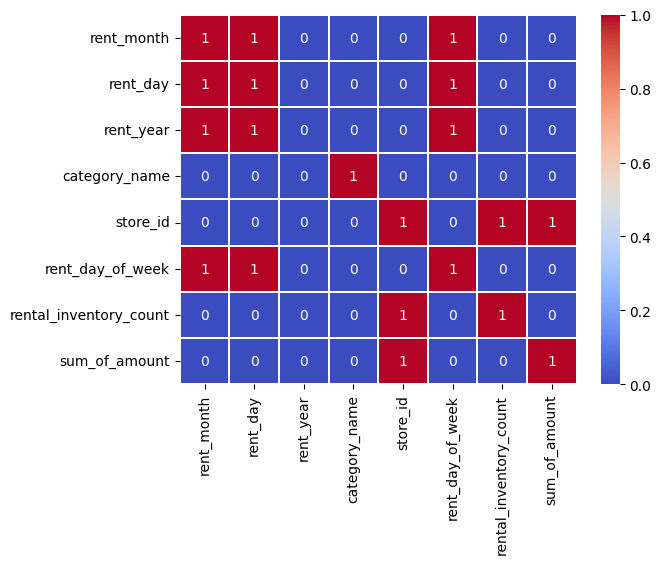

In [35]:
final = {}
for i in demand_grouped.columns:
  final[i] = {}
  for j in demand_grouped.columns:

    if i in cont and j in cont:
      result = two_sample(demand_grouped[i],demand_grouped[j])

    elif i in cat and j in cat:
      result = chi_square(demand_grouped[i],demand_grouped[j])

    elif i in cont and j in cat:
      result = annova(i,j)

    elif i in cat and j in cont:
      result = annova(j,i)
    if result :
      final[i][j]=1
    else:
      final[i][j]=0

final_df = pd.DataFrame(final)
sns.heatmap(final_df,cmap ="coolwarm",linewidths=0.2,annot=True)

## Inventory_Count_prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

x = demand_grouped.drop(columns = {"sum_of_amount","rental_inventory_count"})
y = demand_grouped["rental_inventory_count"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
model = GradientBoostingRegressor()

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print only the best parameters
print("Best Parameters:", grid_search.best_params_)



Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [13]:
Demand_Model_Count = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, min_samples_split = 10 , n_estimators=100).fit(x_train,y_train)
y_pred4 = Demand_Model_Count.predict(x_test)
print("Mean Square Error",mean_squared_error(y_test,y_pred4))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred4))#priority 2
print("R2_Scroe",r2_score(y_test,y_pred4)) #priority 1



Mean Square Error 15.108976018088347
Mean Absolute Error 3.1475246509202304
R2_Scroe 0.7128526437385214


In [14]:
with open('Model/Demand_Model_Count.pkl', 'wb') as file:
    pkl.dump(Demand_Model_Count, file)

In [15]:
x = demand_grouped.drop(columns = {"sum_of_amount"})
y = demand_grouped["sum_of_amount"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
model = GradientBoostingRegressor()

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print only the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [17]:
Expected_Sales_Model = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, min_samples_split = 2 , n_estimators=100).fit(x_train,y_train)
y_pred4 = Expected_Sales_Model.predict(x_test)
print("Mean Square Error",mean_squared_error(y_test,y_pred4))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred4))#priority 2
print("R2_Scroe",r2_score(y_test,y_pred4)) #priority 1

Mean Square Error 77.44678425657243
Mean Absolute Error 6.822451971039408
R2_Scroe 0.9232623183616839


In [18]:
with open('Model/Expected_Sales_Model.pkl', 'wb') as file:
    pkl.dump(Expected_Sales_Model, file)

**Expected_Sales_Model Inputs**
* rent Month
* rent day
* rent year
* category name
* store id
* rent day_of_week
* the input of prev model output

**Demand_Model_Count Inputs**
* rent Month
* rent day
* rent year
* category name
* store id
* rent day_of_week

In [19]:
category_name_li = ['Documentary', 'Horror', 'Family', 'Foreign', 'Comedy', 'Sports',
       'Music', 'Animation', 'Action', 'New', 'Sci-Fi', 'Classics',
       'Games', 'Children', 'Travel', 'Drama']

# Sample data to insert
# Initialize the dictionary (lists) to store data temporarily
df_data = {
    "rent_month": [],
    "rent_day": [],
    "rent_year": [],
    "category_name": [],
    "store_id": [],
    "rent_day_of_week": [],
}

date = "04-07-2006"
store_id = 1

# Split the date into day, month, and year
rent_day, rent_month, rent_year = map(int, date.split('-'))

# Get the day of the week from the date (e.g., 'Tuesday')
rent_day_of_week = pd.Timestamp(f'{rent_year}-{rent_month:02d}-{rent_day:02d}').strftime('%A')
for i in category_name_li:
# Append the data as a row to the dictionary
    df_data["rent_month"].append(rent_month)
    df_data["rent_day"].append(rent_day)
    df_data["rent_year"].append(rent_year)
    df_data["category_name"].append(i)
    df_data["store_id"].append(store_id)
    df_data["rent_day_of_week"].append(rent_day_of_week)

# Convert the dictionary to a DataFrame
df = pd.DataFrame(df_data)


# Load encoders from pickle file
with open('Model/demand_model_encoders.pkl', 'rb') as file:
    encoders_app = pkl.load(file)

# Apply encoders to the appropriate columns
for column in df.columns:
    if column in encoders_app:  # Check if an encoder exists for the column
        df[column] = encoders_app[column].transform(df[column])


pred = {
    "category":[],
    "count":[]
}
for i in range(len(category_name_li)):
    li = np.array(df.iloc[i].tolist()).reshape(1, -1)
    count = round(Demand_Model_Count.predict(li)[0], 0)
    pred["category"].append(category_name_li[i])
    pred["count"].append(count)
pred = pd.DataFrame(pred)




count_li = pred["count"].to_list()
df["rental_inventory_count"] = count_li

li_1=[]
for i in range(len(category_name_li)):
    li = np.array(df.iloc[i].tolist()).reshape(1, -1)
    amount = round(Expected_Sales_Model.predict(li)[0], 0)
    li_1.append(amount)

pred["amount"] = li_1

pred

c:\Users\GOPINATH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\GOPINATH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\GOPINATH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\GOPINATH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\GOPINATH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWar

,category,count,amount
0,Documentary,2.0,9.0
1,Horror,1.0,4.0
2,Family,3.0,10.0
3,Foreign,3.0,12.0
4,Comedy,2.0,12.0
5,Sports,6.0,21.0
6,Music,1.0,3.0
7,Animation,3.0,10.0
8,Action,3.0,12.0
9,New,2.0,9.0


In [20]:
from datetime import datetime, timedelta


In [21]:
def pred(input_date, input_store_id):
    category_name_li = ['Documentary', 'Horror', 'Family', 'Foreign', 'Comedy', 'Sports',
                        'Music', 'Animation', 'Action', 'New', 'Sci-Fi', 'Classics',
                        'Games', 'Children', 'Travel', 'Drama']

    # Initialize the dictionary (lists) to store data temporarily
    pred = {
        "category": [],
        "count": []
    }
    df_data = {
        "rent_month": [],
        "rent_day": [],
        "rent_year": [],
        "category_name": [],
        "store_id": [],
        "rent_day_of_week": [],
    }

    date = input_date
    store_id = input_store_id

    # Split the date into day, month, and year
    rent_day, rent_month, rent_year = map(int, date.split('-'))

    # Get the day of the week from the date (e.g., 'Tuesday')
    rent_day_of_week = pd.Timestamp(f'{rent_year}-{rent_month:02d}-{rent_day:02d}').strftime('%A')
    for i in category_name_li:
        # Append the data as a row to the dictionary
        df_data["rent_month"].append(rent_month)
        df_data["rent_day"].append(rent_day)
        df_data["rent_year"].append(rent_year)
        df_data["category_name"].append(i)
        df_data["store_id"].append(store_id)
        df_data["rent_day_of_week"].append(rent_day_of_week)

    # Convert the dictionary to a DataFrame
    df = pd.DataFrame(df_data)

    # Load encoders from pickle file
    with open('Model/demand_model_encoders.pkl', 'rb') as file:
        encoders_app = pkl.load(file)

    # Apply encoders to the appropriate columns
    for column in df.columns:
        if column in encoders_app:  # Check if an encoder exists for the column
            df[column] = encoders_app[column].transform(df[column])

    for i in range(len(category_name_li)):
        li = np.array(df.iloc[i].tolist()).reshape(1, -1)
        count = round(Demand_Model_Count.predict(li)[0], 0)
        pred["category"].append(category_name_li[i])
        pred["count"].append(count)
        
    pred = pd.DataFrame(pred)

    count_li = pred["count"].to_list()
    df["rental_inventory_count"] = count_li
    li_1 = []
    for i in range(len(category_name_li)):
        li = np.array(df.iloc[i].tolist()).reshape(1, -1)
        amount = round(Expected_Sales_Model.predict(li)[0], 0)
        li_1.append(amount)

    pred["amount"] = li_1
    return pred

# Get user input for the date
inp = input("Enter the date (DD-MM-YYYY): ")

# Convert input string to a datetime object
base_date = datetime.strptime(inp, '%d-%m-%Y')
store_id = int(input())

# Generate predictions for the current date and the next two days
pred1 = pred(inp, 1)  # Use store_id as 1 for simplicity
pred2 = pred((base_date + timedelta(days=1)).strftime('%d-%m-%Y'), store_id)
pred3 = pred((base_date + timedelta(days=2)).strftime('%d-%m-%Y'), store_id)

# Merge predictions
prediction = pd.concat([pred1, pred2, pred3], axis=1, keys=["Day 1", "Day 2", "Day 3"])
prediction

c:\Users\GOPINATH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\GOPINATH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\GOPINATH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\GOPINATH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\GOPINATH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWar

Day 1                     Day 2                     Day 3        \
       category count amount     category count amount     category count   
0   Documentary  10.0   39.0  Documentary  18.0   78.0  Documentary  18.0   
1        Horror   8.0   29.0       Horror  16.0   68.0       Horror  16.0   
2        Family  11.0   44.0       Family  19.0   80.0       Family  19.0   
3       Foreign  11.0   46.0      Foreign  19.0   81.0      Foreign  19.0   
4        Comedy  10.0   42.0       Comedy  18.0   88.0       Comedy  18.0   
5        Sports  14.0   60.0       Sports  22.0   99.0       Sports  22.0   
6         Music   9.0   35.0        Music  16.0   66.0        Music  16.0   
7     Animation  11.0   42.0    Animation  19.0   78.0    Animation  19.0   
8        Action  11.0   44.0       Action  19.0   74.0       Action  19.0   
9           New  10.0   40.0          New  18.0   82.0          New  18.0   
10       Sci-Fi  11.0   46.0       Sci-Fi  19.0   85.0       Sci-Fi  19.0   
11     Classics  10.0   36.0     Classics  18.0   74.0     Classics  18.0   
12        Games   9.0   37.0        Games  17.0   73.0        Games  17.0   
13     Children   9.0   33.0     Children  18.0   74.0     Children  18.0   
14       Travel   9.0   34.0       Travel  17.0   69.0       Travel  16.0   
15        Drama  10.0   41.0        Drama  18.0   80.0        Drama  18.0   

           
   amount  
0    78.0  
1    68.0  
2    79.0  
3    82.0  
4    86.0  
5    99.0  
6    67.0  
7    77.0  
8    73.0  
9    82.0  
10   85.0  
11   72.0  
12   73.0  
13   72.0  
14   65.0  
15   80.0